In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("train.csv")
df.shape

(404290, 6)

In [4]:
df.sample(10)

,id,qid1,qid2,question1,question2,is_duplicate
350745,350745,479500,479501,"Which is more important, MATLAB, c++ or python...",Where should I go for VAT/CST/TIN registration...,0
76821,76821,131258,108665,Why is Narendra Modi promoting Jio?,Is PM Narendra Modi the brand ambassador of Re...,1
2266,2266,4506,4507,What would be a realistic plan to lose weight?,How can I efficiently lose weight?,1
123664,123664,186132,103197,Poll Question! If you shoot me in The head at ...,Can you shoot a Dangerous Human easily death w...,1
245169,245169,357948,357949,How do I repair my relationship after I cheated?,How can you repair your relationship after you...,0
288862,288862,409878,409879,I need an help. Please can you suggest me a we...,What are the suggestions to get a good score i...,0
296149,296149,46956,26997,Which are the best SEO companies in Delhi?,What are the top most SEO Company in Delhi?,1
266235,266235,260723,345417,What are the resource files in C++?,What is a resource file?,0
145682,145682,230309,176813,What cell parts are only found in plant cells?,Which parts of plant cells are not found in an...,0
86164,86164,10693,4121,Why is Saltwater Taffy candy imported in Hong ...,Why is Saltwater taffy candy imported in Japan?,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404290 non-null  int64 
 1   qid1          404290 non-null  int64 
 2   qid2          404290 non-null  int64 
 3   question1     404289 non-null  object
 4   question2     404288 non-null  object
 5   is_duplicate  404290 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


In [6]:
# missing values
df.isnull().sum()

id              0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64

In [7]:
# duplicate rows
df.duplicated().sum()

0

0    255027
1    149263
Name: is_duplicate, dtype: int64
0    63.080215
1    36.919785
Name: is_duplicate, dtype: float64


<AxesSubplot: ylabel='Density'>

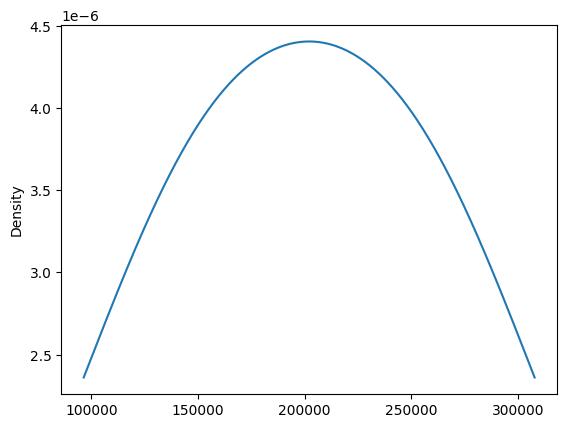

In [16]:
# Distribution of duplicate and non-duplicate questions

print(df['is_duplicate'].value_counts())
print((df['is_duplicate'].value_counts()/df['is_duplicate'].count())*100)
df['is_duplicate'].value_counts().plot(kind='density')

In [17]:
# Repeated questions

qid = pd.Series(df['qid1'].tolist() + df['qid2'].tolist())
print('Number of unique questions',np.unique(qid).shape[0])
x = qid.value_counts()>1
print('Number of questions getting repeated',x[x].shape[0])

Number of unique questions 537933
Number of questions getting repeated 111780


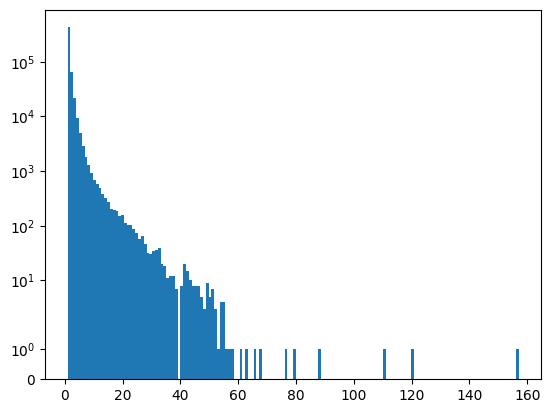

In [18]:
# Repeated questions histogram

plt.hist(qid.value_counts().values,bins=160)
plt.yscale('symlog')
plt.show()